<h1>HW5</h1>

# Question 1
### (Beta Distribution) Complete the following exercises 

### 1.1 

Create a function to calculate the probability density function (PDF) of  beta distribution:

\begin{equation*}
f(x;\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
\end{equation*}


* Function name: pdf_beta

* Input: $\alpha$, $\beta$, x

* Output: f(x;$\alpha$,$\beta$)

* Use SpecialFunctions.gamma() for the gamma function


In [12]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [13]:
import SpecialFunctions
import Plots

In [9]:
beta(α,β,p) = p^(α-1)*(1-p)^(β-1)/(SpecialFunctions.gamma(α)*SpecialFunctions.gamma(β)/SpecialFunctions.gamma(α+β))

beta (generic function with 1 method)

### 1.2

1. Create a x from 0 to 1 with increment of 0.001 as the probability of the event. 
2. Create $\alpha$ = 0.5 and $\beta$ = 0.5
3. Calculate the pdf of the beta distribution over x 
4. Plot pdf vs. x
5. What is the shape of the beta distribution

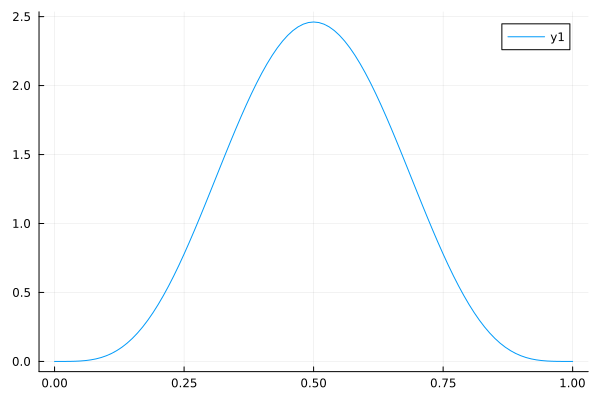

In [70]:
x = 0:0.001:1
α = 0.5
β = 0.5
pdf_beta = beta.(α,β,x)
Plots.plot(x,pdf_beta)

U shape

### 1.3

1. Change $\alpha$ = 1 and $\beta$ = 1
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

In [ ]:
x = 0:0.001:1
α = 1
β = 1
pdf_beta = beta.(α,β,x)
Plots.plot(x,pdf_beta)

Uniform distribution shape

### 1.4

1. Change $\alpha$ = 5 and $\beta$ = 5
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

In [ ]:
x = 0:0.001:1
α = 5
β = 5
pdf_beta = beta.(α,β,x)
Plots.plot(x,pdf_beta)

"bell curve" (Gaussian) shape

#### In our class on Tuesday, we went through how a Beta distribution is the conjugate prior of a binomial distribution that can be used in a bayesian inference. 

If you forgot the derivation, [here is an example](https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb). 

### 1.5

#### Assume we are using the beta distribution from 1.4 as our prior distribution for a coin flipping experiment to calculate the true distribution of flipping the coin (posterior distribution).

Given the experiment results in 35 heads and 65 tails.

1. Calculate the pdf of the posterior distribution given the prior and the results.
2. Plot pdf of the prior distribution in the same plot
3. Describe how the distribution is changed after the data came in

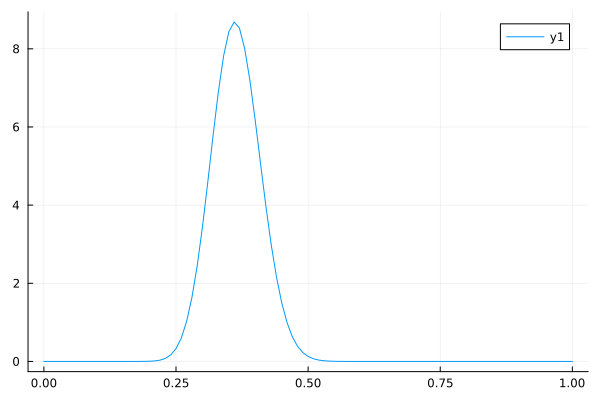

In [71]:
α = 40
β = 70
pdf_beta_updated = beta.(α,β,x)
Plots.plot(x,pdf_beta_updated)
Plots.plot!(x,pdf_beta)

The posterior is shifted to the left and less deviated

Let k represents the number of heads, n represents the total number of flips, $\pi$ represents the probability of success, and X represents data. 
\begin{equation*}
f(\pi|X) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
\end{equation*}
You can ignore the marginal probability calculation since P(B) is hard to compute and it mainly work as a normalization factor. 

# Question 2
### (Conjugate Prior) Read the following example and complete the exercises 

#### In question 1, you see when a Beta distribution is used as the prior for a event that follows a binomial distribution (P(B|A)), the posterior distribution (P(A|B)) follows a Beta distribution. Using a conjugate prior simplify the posterior computation by keeping the posterior distribution identical to the prior distribution.


### 2.1 

Gaussian distribution is a conjugate prior of itself. Below is the probability density function of gaussian distribution. Given your likelihood P(Data|Hypothesis) follows N($\mu_1$, $\sigma_1$) and prior P(Hypothesis) follows N($\mu_2$, $\sigma_2$), derive the probability density function of the posterior distribution with updated $\mu$ and $\sigma$. Please show the whole derivation process to earn full credit.

\begin{equation*}
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
\end{equation*}

*You can ignore the marginal probability during the derivation.

\begin{equation*}
P(A|B) \propto P(B|A)P(A) 
\end{equation*}

### Hint 1
See [this page](https://jupyterbook.org/en/stable/content/math.html) for how to write equations in jupyter notebook

### Hint 2
The posterior probability is gaussian 

### Hint 3
$x^a*x^b = x^{(a+b)}$

Prior: 

\begin{equation*}
P(\mu_1) = N(\mu_1;\mu_2,\sigma_2) 
\end{equation*}

\begin{equation*}
P(\mu_1) = \frac{1}{\sqrt{2\pi\sigma_2^2}}e^{-\frac{1}{2}(\frac{\mu_1-\mu_2}{\sigma_2})^2}
\end{equation*}

Likelihood:

\begin{equation*}
P(x|\mu_1) = \prod_{i=1}^n N(x_i;\mu_1,\sigma_1) 
\end{equation*}

\begin{equation*}
P(x|\mu_1)= \prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma_1^2}}e^{-\frac{1}{2}(\frac{x_i-\mu_1}{\sigma_1})^2} 
\end{equation*}

\begin{equation*}
P(x|\mu_1)= \frac{1}{\sqrt{2\pi\sigma_1^2}}e^{\sum_{i=1}^n-\frac{1}{2}(\frac{x_i-\mu_1}{\sigma_1})^2} 
\end{equation*}

\begin{equation*}
P(x|\mu_1)= \frac{1}{\sqrt{2\pi\sigma_1^2}}e^{-\frac{1}{2}\frac{\sum_{i=1}^n (x_i-\mu_1)^2}{\sigma_1^2}} 
\end{equation*}

Posterior:

\begin{equation*}
P(\mu_1|x) \propto P(x|\mu_1)P(\mu_1)
\end{equation*}


\begin{equation*}
P(\mu_1|x) \propto \frac{1}{\sqrt{2\pi\sigma_1^2}}e^{-\frac{1}{2}\frac{\sum_{i=1}^n (x_i-\mu_1)^2}{\sigma_1^2}}\frac{1}{\sqrt{2\pi\sigma_2^2}}e^{-\frac{1}{2}(\frac{\mu_1-\mu_2}{\sigma_2})^2}
\end{equation*}

if $\sigma_1^2$ is constant, we can rewrite the equation as:

\begin{equation*}
P(\mu_1|x) \propto e^{-\frac{1}{2}\frac{\sum_{i=1}^n (x_i-\mu_1)^2}{\sigma_1^2}}e^{-\frac{1}{2}(\frac{\mu_1-\mu_2}{\sigma_2})^2}
\end{equation*}

$x^a*x^b = x^{(a+b)}$

\begin{equation*}
P(\mu_1|x) \propto e^{-\frac{1}{2}(\frac{\sum_{i=1}^n (x_i-\mu_1)^2}{\sigma_1^2}+(\frac{\mu_1-\mu_2}{\sigma_2})^2)}
\end{equation*}

\begin{equation*}
P(\mu_1|x) \propto e^{-\frac{1}{2}(\frac{\sum_{i=1}^n (x_i^2-2x_i\mu_1+\mu_1^2)}{\sigma_1^2}+\frac{\mu_1^2-2\mu_1\mu_2+\mu_2^2}{\sigma_2^2})}
\end{equation*}

Terms that don't contain $\mu_1$ can be considered constant and factored out

\begin{equation*}
P(\mu_1|x) \propto e^{-\frac{1}{2}(\frac{\sum_{i=1}^n(-2x_i\mu_1+\mu_1^2)}{\sigma_1^2}+\frac{\mu_1^2-2\mu_1\mu_2}{\sigma_2^2})}e^{-\frac{1}{2}(\frac{\sum_{i=1}^nx_i^2}{\sigma_1^2}+\frac{\mu_2^2}{\sigma_2^2})}
\end{equation*}

\begin{equation*}
P(\mu_1|x) \propto e^{-\frac{1}{2}(\frac{\sum_{i=1}^n(-2x_i\mu_1+\mu_1^2)}{\sigma_1^2}+\frac{\mu_1^2-2\mu_1\mu_2}{\sigma_2^2})}
\end{equation*}

We want to map the exponent of $P(\mu_1|x)$ into the format: $
{-\frac{1}{2}(\frac{\mu_1-\mu_{new}}{\sigma_{new}})^2} = {-\frac{1}{2}\frac{\mu_1^2-2\mu_1\mu_{new}+\mu_{new}^2}{\sigma_{new}^2}}
$

\begin{equation*}
-\frac{1}{2}(\frac{\sum_{i=1}^n(-2x_i\mu_1+\mu_1^2)}{\sigma_1^2}+\frac{\mu_1^2-2\mu_1\mu_2}{\sigma_2^2})
\end{equation*}

\begin{equation*}
\bar{x} = \frac{\sum_{i=1}^nx_i}{n}\\
\end{equation*}

\begin{equation*}
-\frac{1}{2}(\frac{-2n\bar{x}\mu_1+n\mu_1^2}{\sigma_1^2}+\frac{\mu_1^2-2\mu_1\mu_2}{\sigma_2^2})\\
\end{equation*}

\begin{equation*}
-\frac{1}{2}(\mu_1^2(\frac{n}{\sigma_1^2}+\frac{1}{\sigma_2^2})-2\mu_1(\frac{n\bar{x}}{\sigma_1^2}+\frac{\mu_2}{\sigma_2^2}))\\
\end{equation*}

By mapping the equation to $
{-\frac{1}{2}\frac{\mu_1^2-2\mu_1\mu_{new}+\mu_{new}^2}{\sigma_{new}^2}}
$:

\begin{equation*}
\frac{\mu_1^2}{\sigma_{new}^2} = \mu_1^2(\frac{n}{\sigma_1^2}+\frac{1}{\sigma_2^2})
\end{equation*}

\begin{equation*}
\sigma_{new}^2 = \frac{1}{\frac{n}{\sigma_1^2}+\frac{1}{\sigma_2^2}}
\end{equation*}

\begin{equation*}
\sigma_{new}^2 = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+n\sigma_2^2}
\end{equation*}

\begin{equation*}
\frac{-2\mu_1\mu_{new}}{\sigma_{new}^2} = -2\mu_1(\frac{n\bar{x}}{\sigma_1^2}+\frac{\mu_2}{\sigma_2^2})
\end{equation*}

\begin{equation*}
\frac{\mu_{new}}{\sigma_{new}^2} = \frac{n\bar{x}}{\sigma_1^2}+\frac{\mu_2}{\sigma_2^2}
\end{equation*}

\begin{equation*}
\frac{\mu_{new}}{\sigma_{new}^2} = \frac{n\bar{x}\sigma_2^2+\mu_2\sigma_1^2}{\sigma_1^2\sigma_2^2}
\end{equation*}

\begin{equation*}
\mu_{new} = \frac{n\bar{x}\sigma_2^2+\mu_2\sigma_1^2}{\sigma_1^2\sigma_2^2}\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+n\sigma_2^2}
\end{equation*}

\begin{equation*}
\mu_{new} = \frac{n\bar{x}\sigma_2^2+\mu_2\sigma_1^2}{\sigma_1^2+n\sigma_2^2}
\end{equation*}

### 2.2 

Based on the results you got in 2.1, what normalization factor is needed for the posterior to satisfy $$\int_{-\infty}^{\infty}P(A|B) = 1$$

In order to normalize a gaussian probability density function, $\frac{1}{\sqrt{2\pi\sigma^2}}$ is used.

With the updated $\sigma$, the normalization factor become:

\begin{equation*}
\frac{1}{\sqrt{2\pi\sigma_{new}^2}} = \frac{1}{\sqrt{2\pi\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+n\sigma_2^2}}}
\end{equation*}

\begin{equation*}
\frac{1}{\sqrt{2\pi\sigma_{new}^2}} = \sqrt{\frac{\sigma_1^2+n\sigma_2^2}{2\pi\sigma_1^2\sigma_2^2}}
\end{equation*}
